K-Means

species: Espécie do pinguim (Adelie, Chinstrap, Gentoo)

island: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)

bill_length_mm: Comprimento do bico em milímetros

bill_depth_mm: Profundidade do bico em milímetros

flipper_length_mm: Comprimento da barbatana em milímetros

body_mass_g: Massa corporal em gramas

sex: Sexo do pinguim (Male, Female)

year: Ano em que a observação foi feita

Nesta tarefa, vamos explorar o algoritmo de clustering K-means aplicado a um contexto diferente do usual. Em vez de segmentar perfis de viajantes ou clientes de e-commerce, vamos usar dados biológicos para segmentar diferentes espécies de pinguins com base em características físicas. Esta abordagem destaca a versatilidade do K-means para diversas áreas além de vendas e marketing.

A base de dados utilizada é a penguins do pacote seaborn, que contém informações sobre três espécies de pinguins: Adelie, Chinstrap e Gentoo. As variáveis disponíveis incluem medições físicas dos pinguins coletadas na Antártica.

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
penguins = sns.load_dataset('penguins')

In [6]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# 1 - Nesse exercício vocês devem verificar se temos variáveis missing, faltantes e excluir esses valores do dataset, também devem excluir as colunas com valores categóricos, que não utilizazam para o Kmeans.


In [9]:
# 1. Remover linhas com valores faltantes (NaN)
penguins_sem_na = penguins.dropna()

# 2. Remover colunas categóricas (que não serão usadas no K-Means)
colunas_categoricas = ['species', 'island', 'sex']
penguins_kmeans = penguins_sem_na.drop(columns=colunas_categoricas)

# 3. Exibir o resultado
print(penguins_kmeans.head())


   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0       3250.0
4            36.7           19.3              193.0       3450.0
5            39.3           20.6              190.0       3650.0


# 2 - Visualize a análise descritiva dos seus dados utilizando a função vista em aula pairplot. É possível já identificar possíveis agrupamentos? Se sim, quantos?

Sim é possivel verificar possiveis agrupamentos, aparentemente vemos 3 grupos dstintos.

NameError: name 'plt' is not defined

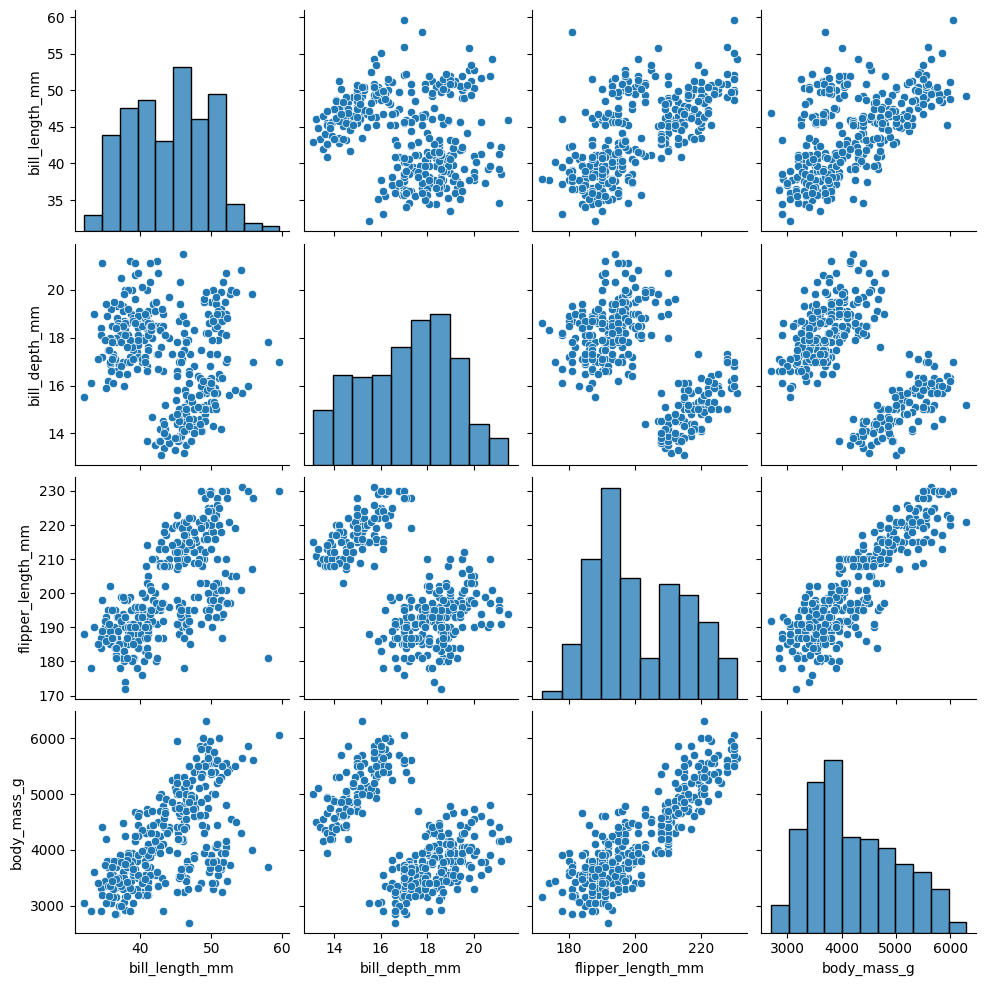

In [10]:
sns.pairplot(penguins_kmeans)

plt.suptitle("Pairplot dos Dados dos Pinguins (sem valores faltantes)", y=1.02)
plt.show()

# 3 - Realize a padronização dos dados e visualize os dados.


In [11]:
# Supondo que 'penguins_kmeans' já tenha apenas colunas numéricas
scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(penguins_kmeans)

# Converter de volta para DataFrame para facilitar análise
dados_padronizados_df = pd.DataFrame(dados_padronizados, columns=penguins_kmeans.columns)

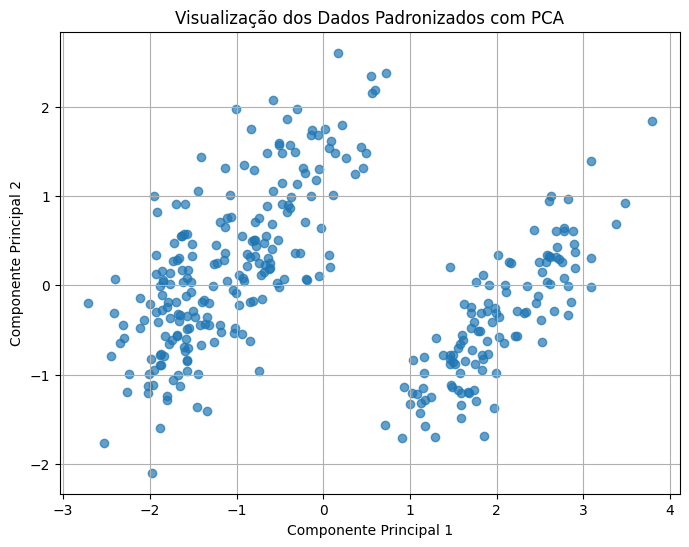

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA para reduzir a 2 dimensões
pca = PCA(n_components=2)
dados_pca = pca.fit_transform(dados_padronizados)

# DataFrame com os componentes principais
pca_df = pd.DataFrame(dados_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('Visualização dos Dados Padronizados com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


# 4 - Aplique o algoritmo do k means escolhendo o numero de clusters como igual a 3, que é que a quantidade de espécies que temos na base.


In [15]:
# K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dados_padronizados)

# Obter os rótulos (clusters atribuídos a cada pinguim)
labels = kmeans.labels_


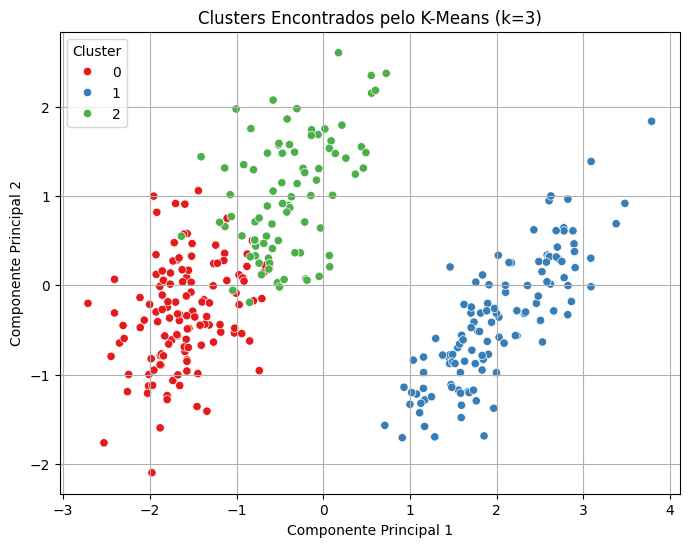

In [16]:
# Criar um DataFrame com os componentes principais e os clusters
pca_df['Cluster'] = labels

# Plotar os clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title('Clusters Encontrados pelo K-Means (k=3)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Cada ponto representa um pinguim.

As cores indicam os grupos formados pelo K-Means.

Esses grupos devem se aproximar das 3 espécies reais



# 5 - Construa pelo 2 matriz de dispersão como realizada em aula indicando os pontos e centroides.

**Comece usando x='bill_length_mm' e y='bill_depth_mm' para analisar o primeiro gráfico e em seguida escolha outras variaveis para o segundo.**

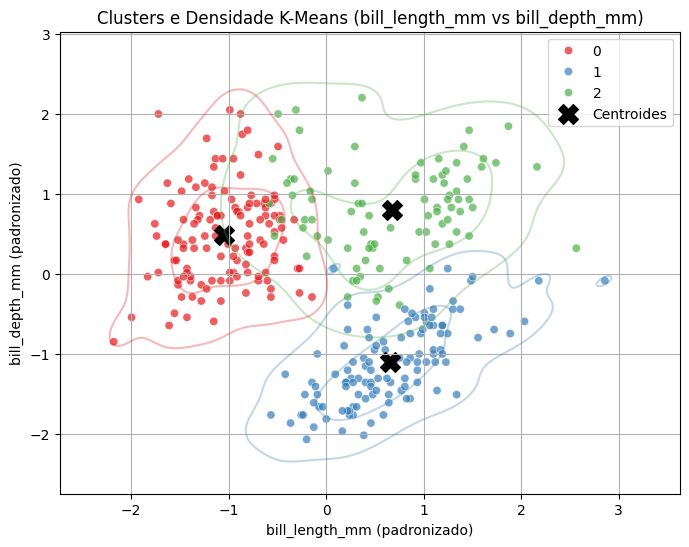

In [19]:

plt.figure(figsize=(8,6))

# Scatter plot dos pontos coloridos por cluster
sns.scatterplot(
    x=dados_padronizados_df['bill_length_mm'],
    y=dados_padronizados_df['bill_depth_mm'],
    hue=dados_padronizados_df['Cluster'],
    palette='Set1',
    alpha=0.7
)

# contornos de densidade para cada cluster
for cluster in dados_padronizados_df['Cluster'].unique():
    subset = dados_padronizados_df[dados_padronizados_df['Cluster'] == cluster]
    sns.kdeplot(
        x=subset['bill_length_mm'],
        y=subset['bill_depth_mm'],
        levels=3,
        color=sns.color_palette('Set1')[cluster],
        alpha=0.3
    )

# Centroides em preto
plt.scatter(
    centroides[:, dados_padronizados_df.columns.get_loc('bill_length_mm')],
    centroides[:, dados_padronizados_df.columns.get_loc('bill_depth_mm')],
    s=200, c='black', marker='X', label='Centroides'
)

plt.title('Clusters e Densidade K-Means (bill_length_mm vs bill_depth_mm)')
plt.xlabel('bill_length_mm (padronizado)')
plt.ylabel('bill_depth_mm (padronizado)')
plt.legend()
plt.grid(True)
plt.show()



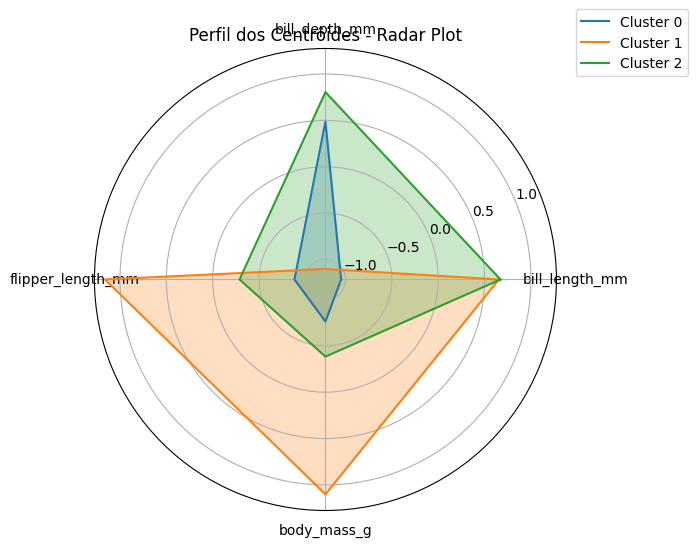

In [21]:
import numpy as np

# Prepararando dados para radar plot
features = dados_padronizados_df.columns[:-1]  # todas as variáveis menos 'Cluster'
num_vars = len(features)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # fechar o círculo

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

for i, centroide in enumerate(centroides):
    values = centroide.tolist()
    values += values[:1]  # fechar o círculo
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), features)
ax.set_title('Perfil dos Centrôides - Radar Plot')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

